In [0]:
import numpy as np
import pandas as pd

In [2]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [3]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


In [4]:
df_can.shape

(195, 43)

In [5]:
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

df_can.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


In [6]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# let's view the first five elements and see how the dataframe was changed
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


In [7]:
all(isinstance(column, str) for column in df_can.columns)

False

In [8]:
df_can.columns = list(map(str, df_can.columns))

# let's check the column labels types now
all(isinstance(column, str) for column in df_can.columns)

True

In [9]:
df_can.set_index('Country', inplace=True)

# let's view the first five elements and see how the dataframe was changed
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


In [10]:
df_can['Total'] = df_can.sum(axis=1)

# let's view the first five elements and see how the dataframe was changed
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15


In [11]:
df_can.shape

(195, 38)

In [12]:
years = list(map(str, range(1980, 2014)))

years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [13]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.1.2


##Area Plot

In [14]:
df_can.sort_values(['Total'], ascending = False, axis=0, inplace=True)

df_top5 = df_can.head()
df_top5 = df_top5[years].transpose()
df_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


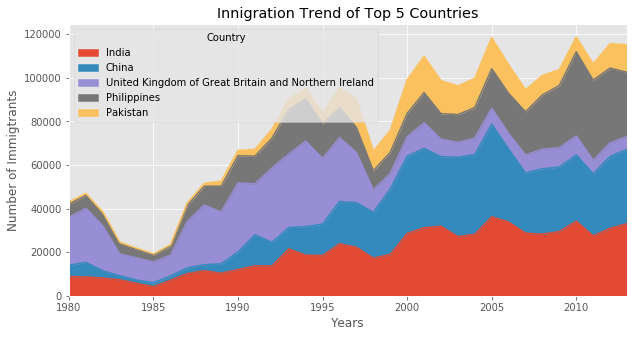

In [15]:
# Using scripting layer option
#plot with stacked true

df_top5.index = df_top5.index.map(int)
df_top5.plot(kind='area', stacked=True, figsize=(10, 5))

plt.title('Innigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigtrants')
plt.xlabel('Years')

plt.show()

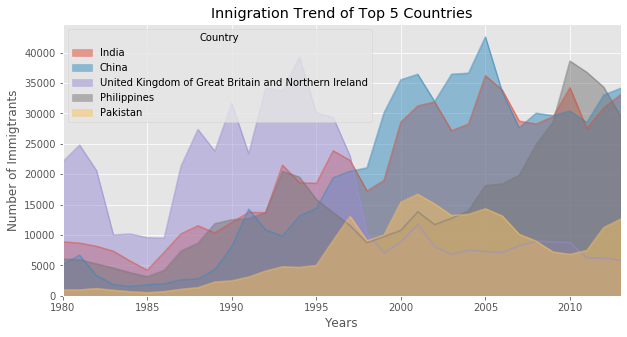

In [16]:
#plot with stacked false

df_top5.index = df_top5.index.map(int)
df_top5.plot(kind='area', stacked=False, figsize=(10, 5))

plt.title('Innigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigtrants')
plt.xlabel('Years')

plt.show()

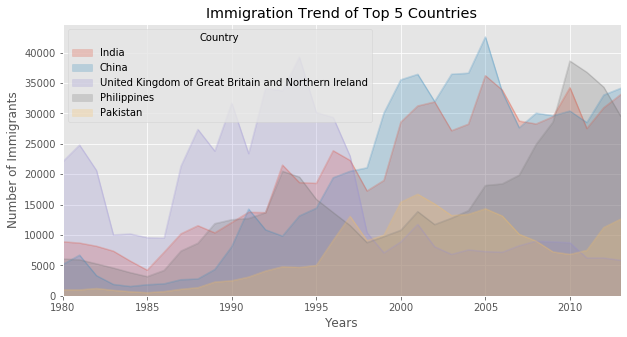

In [17]:
# Changing transperancy

df_top5.plot(kind='area', 
             alpha=0.25, # 0-1, default value a= 0.5
             stacked=False,
             figsize=(10, 5),
            )

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

Text(0.5, 0, 'Years')

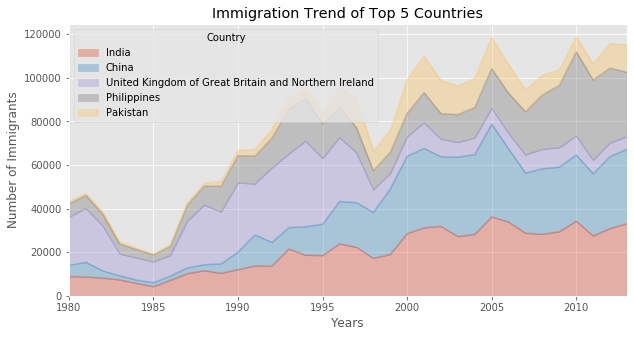

In [18]:
#Using artist layer

ax = df_top5.plot(kind='area', alpha=0.35, figsize=(10, 5))

ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

In [0]:
#Use the scripting layer to create a stacked area plot of the 5 countries 
#that contributed the least to immigration to Canada from 1980 to 2013

df_least5 = df_can.tail(5)

In [20]:
df_least5 = df_least5[years].transpose() 
df_least5.head()

Country,San Marino,New Caledonia,Marshall Islands,Western Sahara,Palau
1980,1,0,0,0,0
1981,0,0,0,0,0
1982,0,0,0,0,0
1983,0,0,0,0,0
1984,0,0,0,0,0


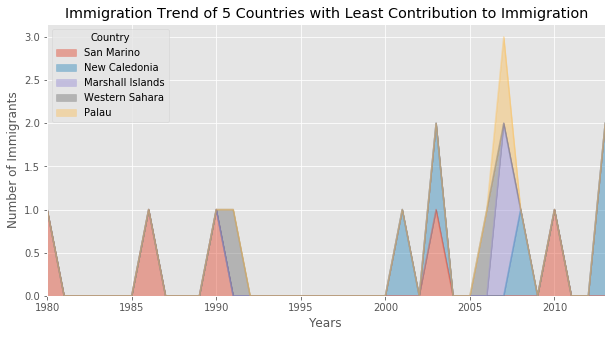

In [21]:
df_least5.index = df_least5.index.map(int)
df_least5.plot(kind = 'area', alpha = 0.45, figsize = (10, 5))

plt.title('Immigration Trend of 5 Countries with Least Contribution to Immigration')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

Text(0.5, 0, 'Years')

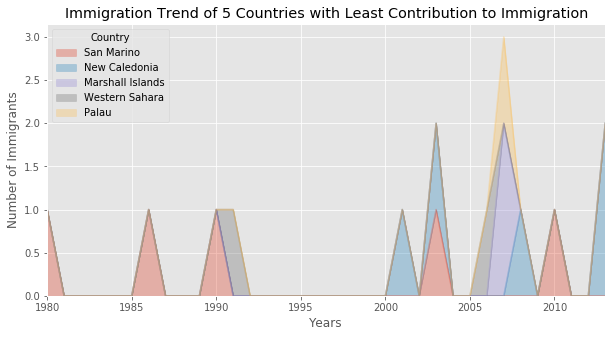

In [22]:
#artist layer to create an unstacked area plot of the 5 countries that contributed the least to immigration to Canada from 1980 to 2013

ax = df_least5.plot(kind='area', alpha=0.35, figsize=(10, 5))

ax.set_title('Immigration Trend of 5 Countries with Least Contribution to Immigration')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

###Histograms

In [23]:
#Showing frequency distribution of the number (population) of new immigrants from the various countries to Canada in 2013
df_can['2013'].head()

Country
India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64

In [0]:
count, bin_edges = np.histogram(df_can['2013'])

In [25]:
count

array([178,  11,   1,   2,   0,   0,   0,   0,   1,   2])

In [26]:
bin_edges

array([    0. ,  3412.9,  6825.8, 10238.7, 13651.6, 17064.5, 20477.4,
       23890.3, 27303.2, 30716.1, 34129. ])

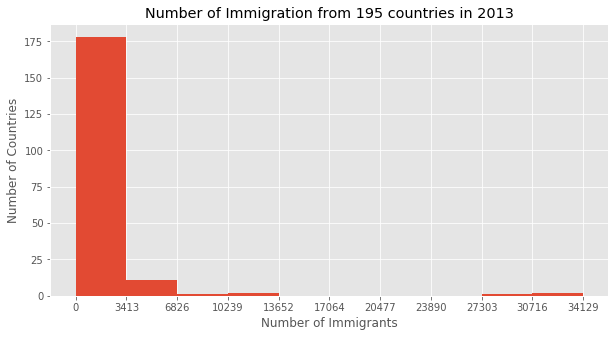

In [27]:
df_can['2013'].plot(kind = 'hist', figsize = (10, 5), xticks = bin_edges)


plt.title('Number of Immigration from 195 countries in 2013')
plt.ylabel('Number of Countries')
plt.xlabel('Number of Immigrants')

plt.show()

In [28]:
#To find immigration distribution for Denmark, Norway, and Sweden for years 1980 - 2013

df_can_2 = df_can.loc[['Denmark', 'Norway', 'Sweden'], years]
df_can_2

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,118,111,158,186,93,111,70,83,63,81,93,81,70,89,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,83,103,74,92,60,65,70,104,31,36,56,78,74,77,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,130,167,179,203,192,176,161,151,123,170,138,184,149,161,129,205,139,193,165,167,159,134,140,140


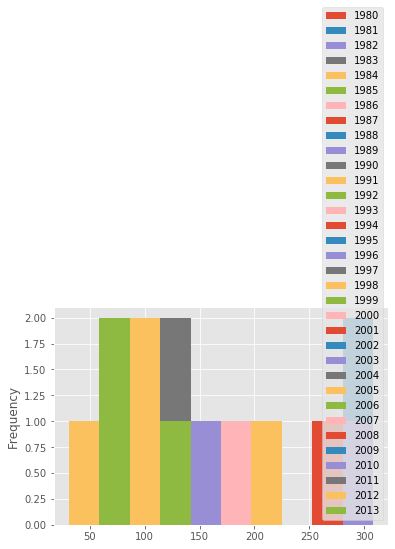

In [29]:
df_can_2.plot.hist()

In [30]:
df_t = df_can_2.transpose()
df_t

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128
1985,73,54,158
1986,93,56,187
1987,109,80,198
1988,129,73,171
1989,129,76,182


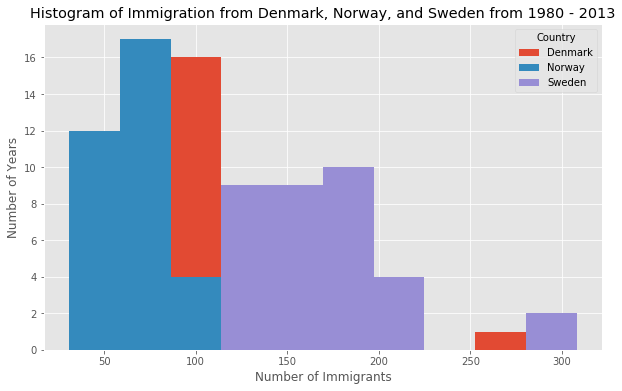

In [31]:
df_t.plot(kind='hist', figsize=(10, 6))

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

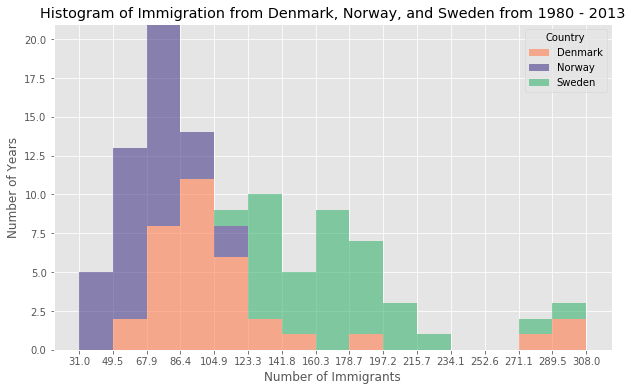

In [32]:
count, bin_edges = np.histogram(df_t, 15)

# un-stacked histogram
df_t.plot(kind ='hist', 
          figsize=(10, 6),
          bins=15,
          alpha=0.6,
          stacked=True,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen']
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

###Bar Chart

In [0]:
#Comparing the number of Icelandic immigrants (country = 'Iceland') to Canada from year 1980 to 2013.

In [34]:
df_iceland = df_can.loc['Iceland', years]
df_iceland.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

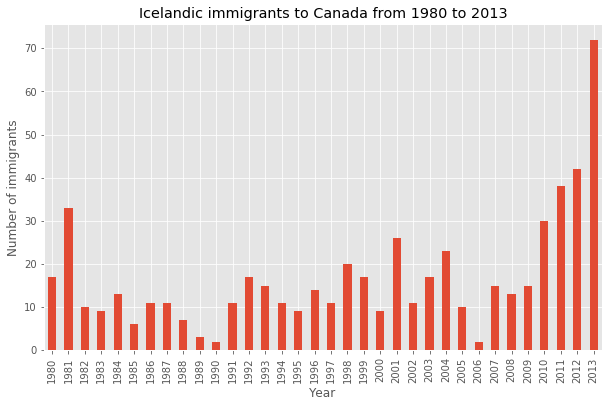

In [35]:
df_iceland.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Icelandic immigrants to Canada from 1980 to 2013') # add title to the plot

plt.show()

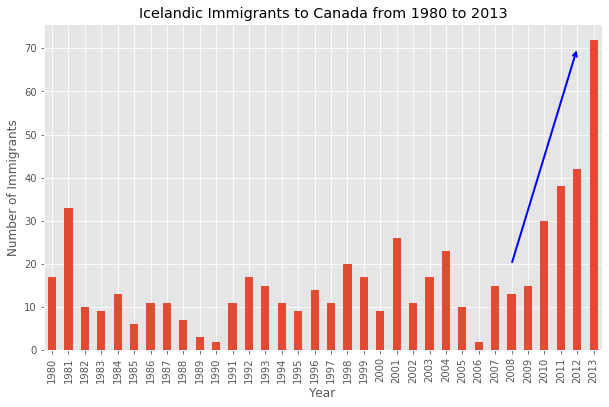

In [36]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90) # rotate the bars by 90 degrees

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',                      # s: str. Will leave it blank for no text
             xy=(32, 70),             # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),         # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )

plt.show()

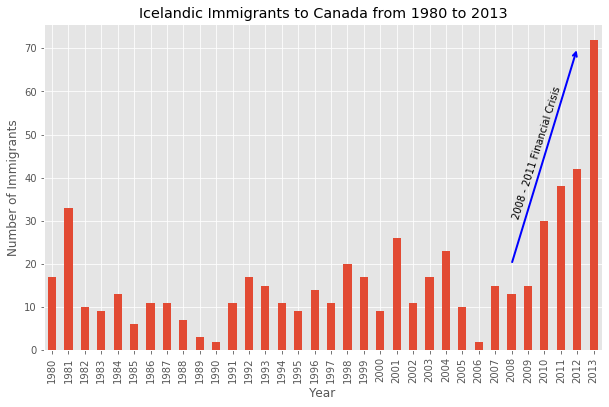

In [37]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90) 

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',                      # s: str. will leave it blank for no text
             xy=(32, 70),             # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),         # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )

# Annotate Text
plt.annotate('2008 - 2011 Financial Crisis', # text to display
             xy=(28, 30),                    # start the text at at point (year 2008 , pop 30)
             rotation=72.5,                  # based on trial and error to match the arrow
             va='bottom',                    # want the text to be vertically 'bottom' aligned
             ha='left',                      # want the text to be horizontally 'left' algned.
            )

plt.show()

In [38]:
#Creating a horizontal bar plot showing the total number of immigrants to Canada from the top 15 countries,
# for the period 1980 - 2013. Label each country with the total immigrant count.

df_can.sort_values(by='Total', ascending = True, inplace = True)

df_top15 = df_can['Total'].tail(15)
df_top15

Country
Romania                                                  93585
Viet Nam                                                 97146
Jamaica                                                 106431
France                                                  109091
Lebanon                                                 115359
Poland                                                  139241
Republic of Korea                                       142581
Sri Lanka                                               148358
Iran (Islamic Republic of)                              175923
United States of America                                241122
Pakistan                                                241600
Philippines                                             511391
United Kingdom of Great Britain and Northern Ireland    551500
China                                                   659962
India                                                   691904
Name: Total, dtype: int64

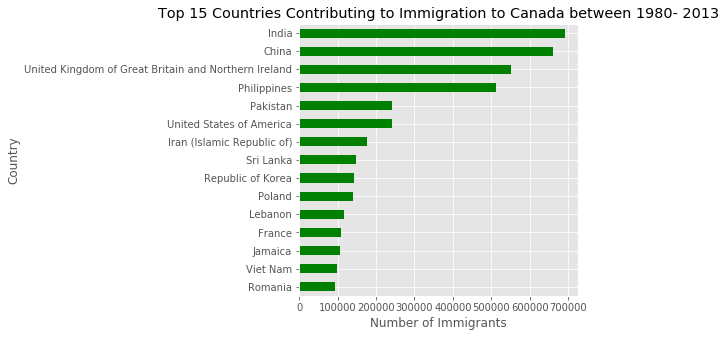

In [39]:
df_top15.plot(kind='barh', figsize = (5, 5), color = 'green')
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Countries Contributing to Immigration to Canada between 1980- 2013')

for index, value in enumerate(df_top15): 
    label = format(int(value), ',') 
    
#     # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
#     plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')
plt.show()

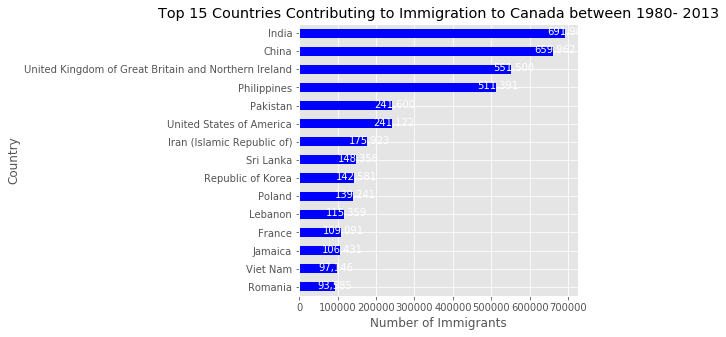

In [40]:
df_top15.plot(kind='barh', figsize = (5, 5), color = 'blue')
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Countries Contributing to Immigration to Canada between 1980- 2013')

for index, value in enumerate(df_top15): 
    label = format(int(value), ',')  
    plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')

plt.show()